In [12]:
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Load data
data_path = project_root / 'data/processed'
prices_df = pd.read_csv(data_path / 'aligned_prices.csv', index_col='Date', parse_dates=True)
returns_df = pd.read_csv(data_path / 'log_returns.csv', index_col='Date', parse_dates=True)

print("Data loaded successfully!")
print(f"\nPrices shape: {prices_df.shape}")
print(f"Returns shape: {returns_df.shape}")
print(f"\nDate range: {prices_df.index.min()} to {prices_df.index.max()}")

Data loaded successfully!

Prices shape: (1255, 7)
Returns shape: (1254, 7)

Date range: 2020-11-24 00:00:00 to 2025-11-21 00:00:00


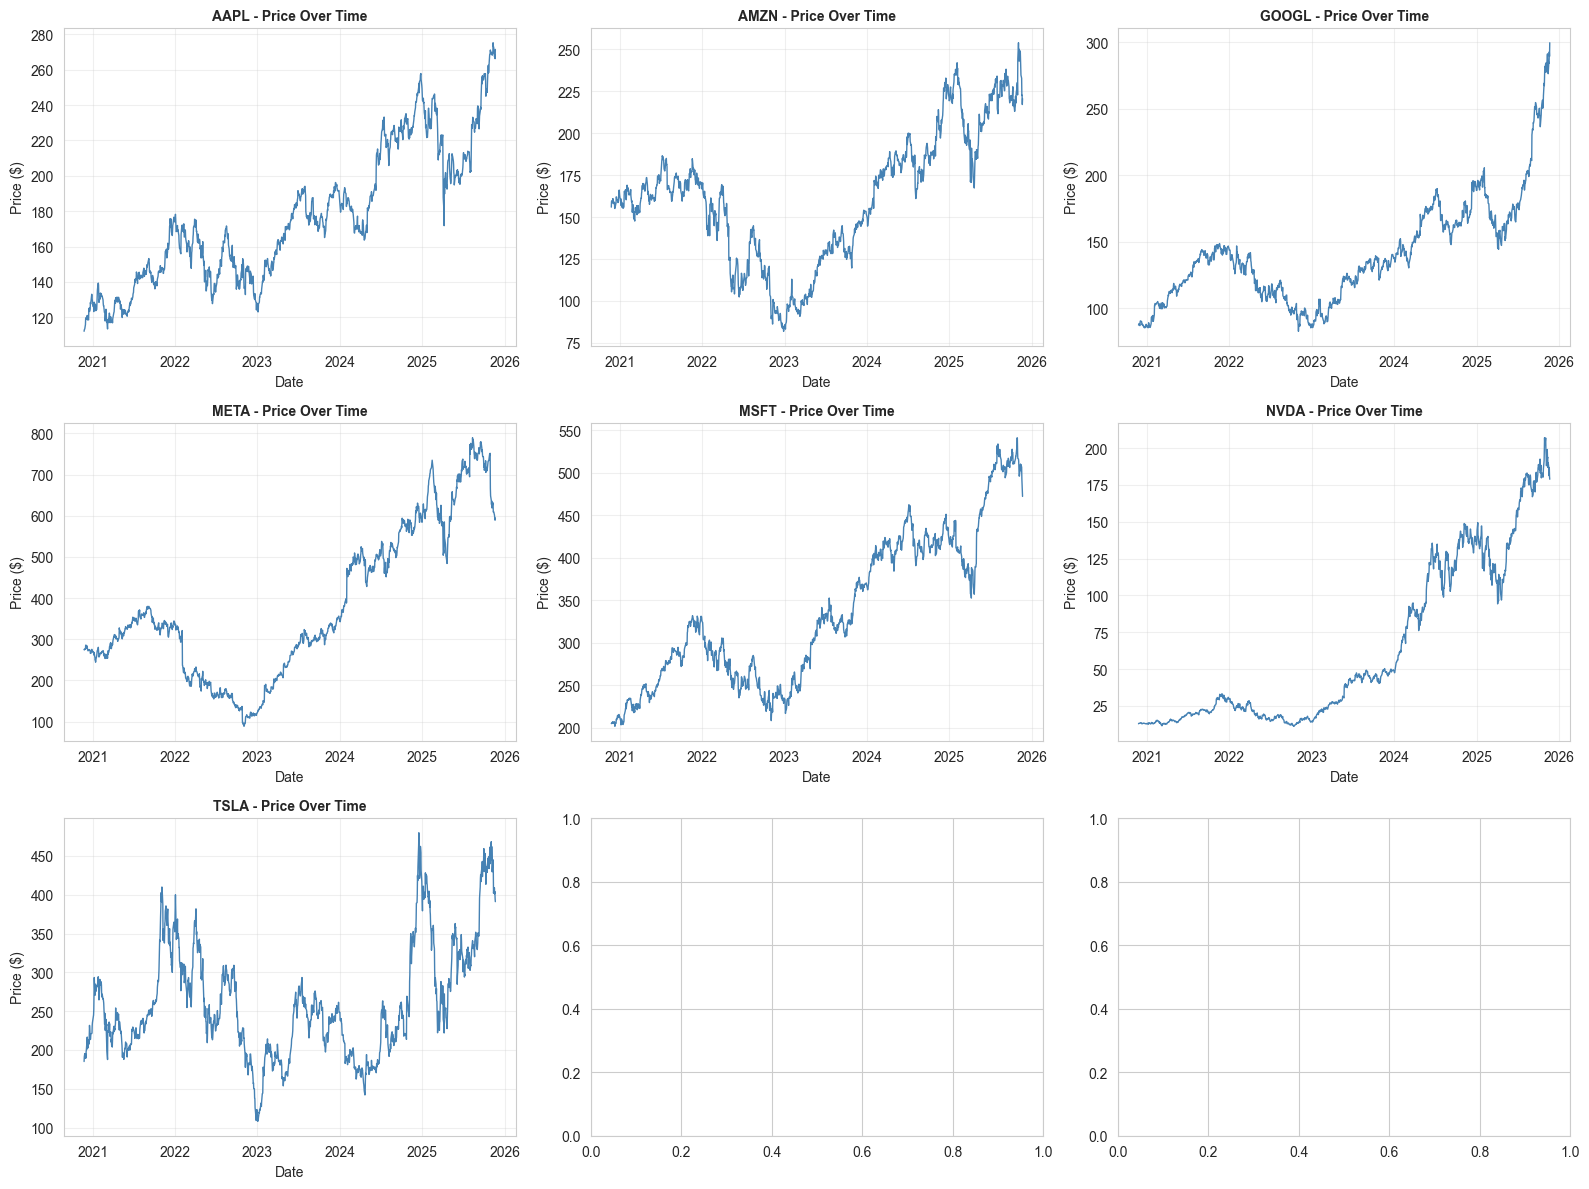

Price time series plots saved.


In [13]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

stocks = prices_df.columns

for idx, stock in enumerate(stocks):
    axes[idx].plot(prices_df.index, prices_df[stock], linewidth=1, color='steelblue')
    axes[idx].set_title(f'{stock} - Price Over Time', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Price ($)')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(project_root / 'figures' / '01_prices_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

print("Price time series plots saved.")

Index(['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA'], dtype='object')


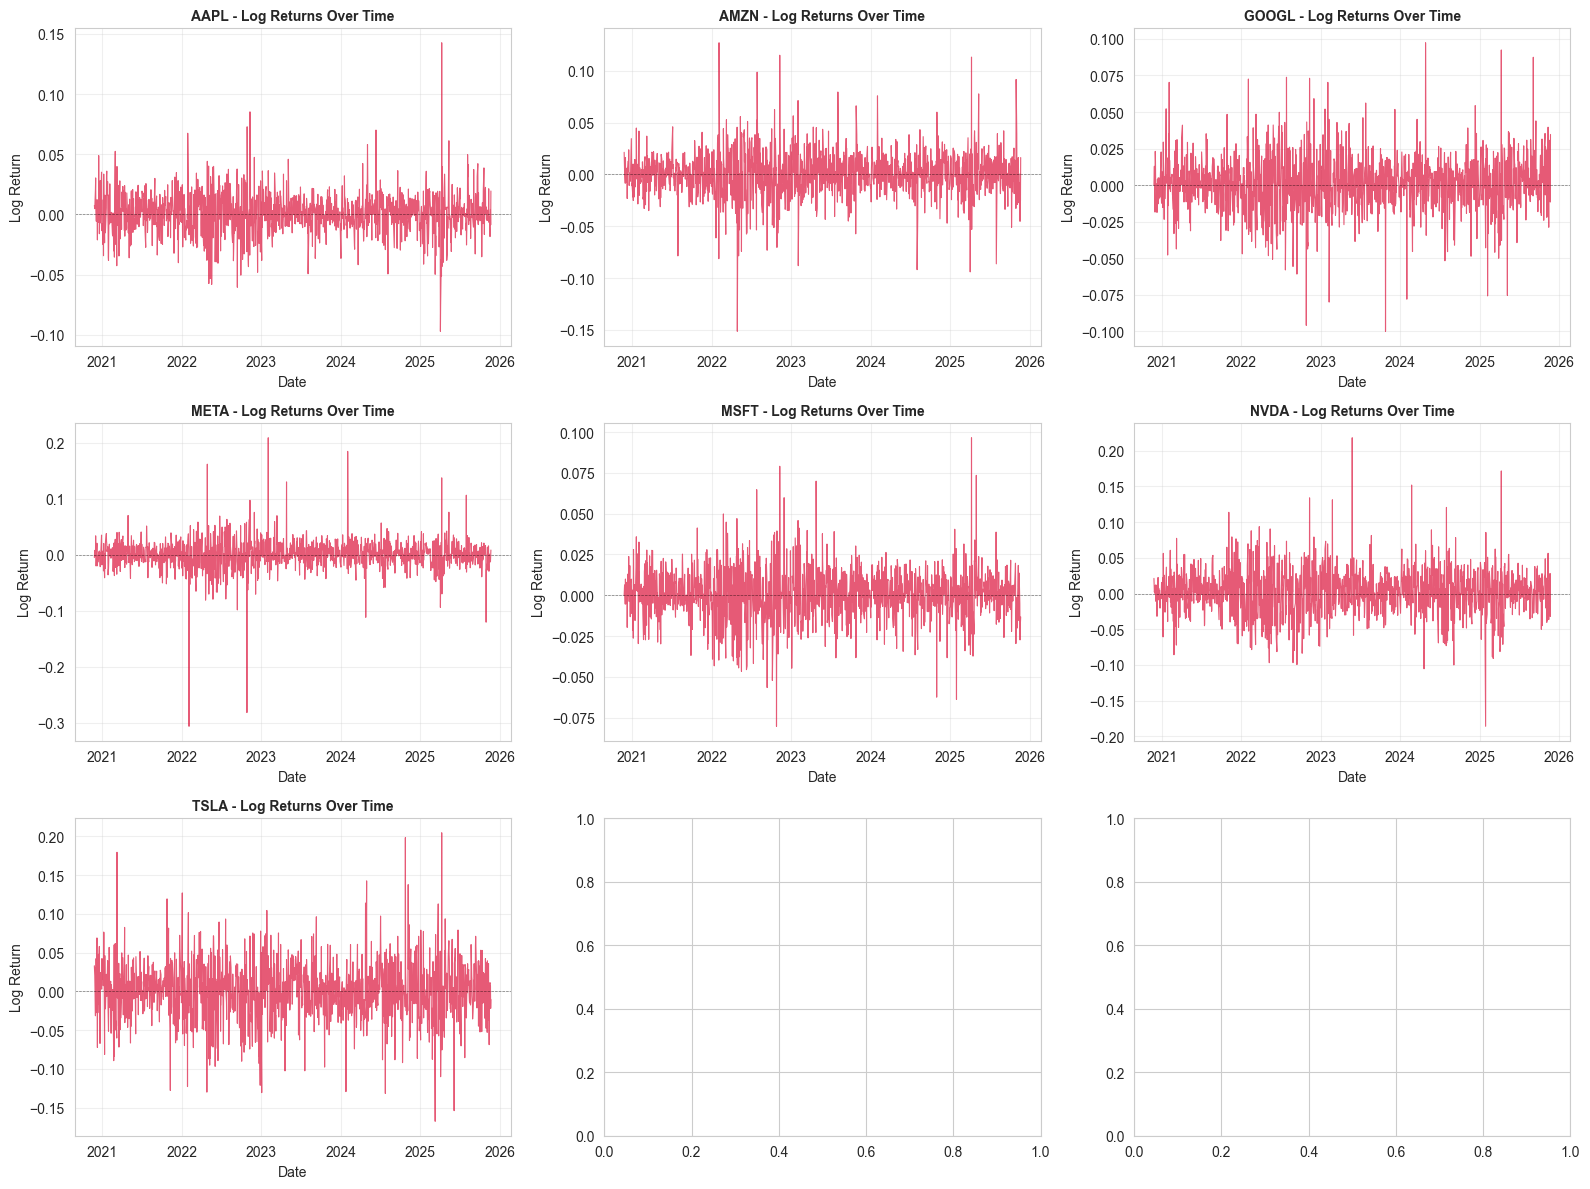

Returns time series plots saved.


In [14]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
print(returns_df.columns)
for idx, stock in enumerate(stocks):
    axes[idx].plot(returns_df.index, returns_df[stock], linewidth=0.8, color='crimson', alpha=0.7)
    axes[idx].set_title(f'{stock} - Log Returns Over Time', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Log Return')
    axes[idx].axhline(y=0, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(project_root / 'figures' / '02_returns_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

print("Returns time series plots saved.")

In [15]:
summary_stats = pd.DataFrame({
    'Mean': returns_df.mean(),
    'Std Dev': returns_df.std(),
    'Min': returns_df.min(),
    'Max': returns_df.max(),
    'Skewness': returns_df.skew(),
    'Kurtosis': returns_df.kurtosis(),
    'Count': returns_df.count()
})

print("\n" + "="*80)
print("SUMMARY STATISTICS FOR LOG RETURNS")
print("="*80)
print(summary_stats.to_string())

# Save to CSV
summary_stats.to_csv(project_root / 'data' / 'summary_statistics.csv')


SUMMARY STATISTICS FOR LOG RETURNS
           Mean   Std Dev       Min       Max  Skewness   Kurtosis  Count
AAPL   0.000705  0.017639 -0.097013  0.142617  0.253682   5.351251   1254
AMZN   0.000277  0.022123 -0.151398  0.126949 -0.088962   5.172996   1254
GOOGL  0.000981  0.019500 -0.099924  0.097348 -0.059824   3.172083   1254
META   0.000614  0.027614 -0.306391  0.209307 -1.218530  26.599219   1254
MSFT   0.000664  0.016162 -0.080295  0.096525  0.088211   3.025952   1254
NVDA   0.002096  0.032583 -0.185946  0.218088  0.228373   3.689535   1254
TSLA   0.000596  0.038286 -0.167546  0.204491  0.083974   2.495353   1254


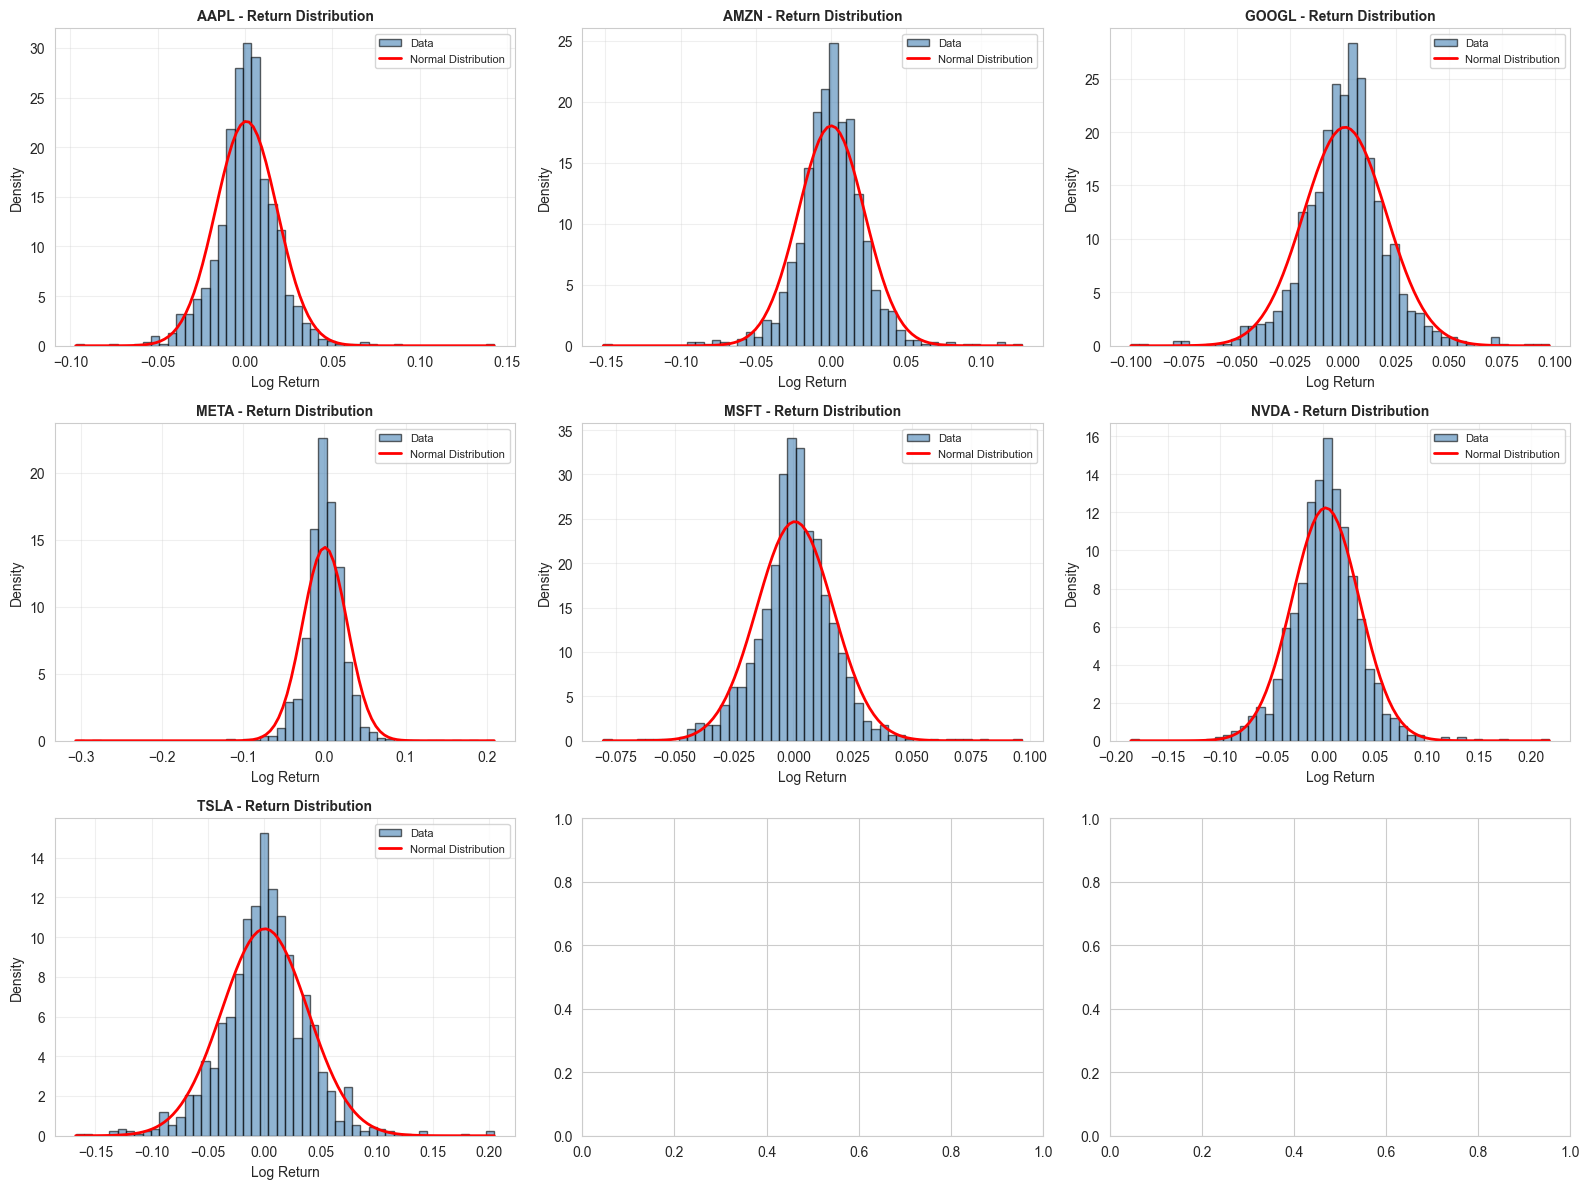

Distribution plots saved.


In [16]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, stock in enumerate(stocks):
    returns = returns_df[stock]
    
    # Histogram
    axes[idx].hist(returns, bins=50, density=True, alpha=0.6, color='steelblue', edgecolor='black', label='Data')
    
    # Overlay normal distribution
    mu, sigma = returns.mean(), returns.std()
    x = np.linspace(returns.min(), returns.max(), 100)
    axes[idx].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal Distribution')
    
    axes[idx].set_title(f'{stock} - Return Distribution', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Log Return')
    axes[idx].set_ylabel('Density')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(project_root / 'figures' / '03_return_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribution plots saved.")

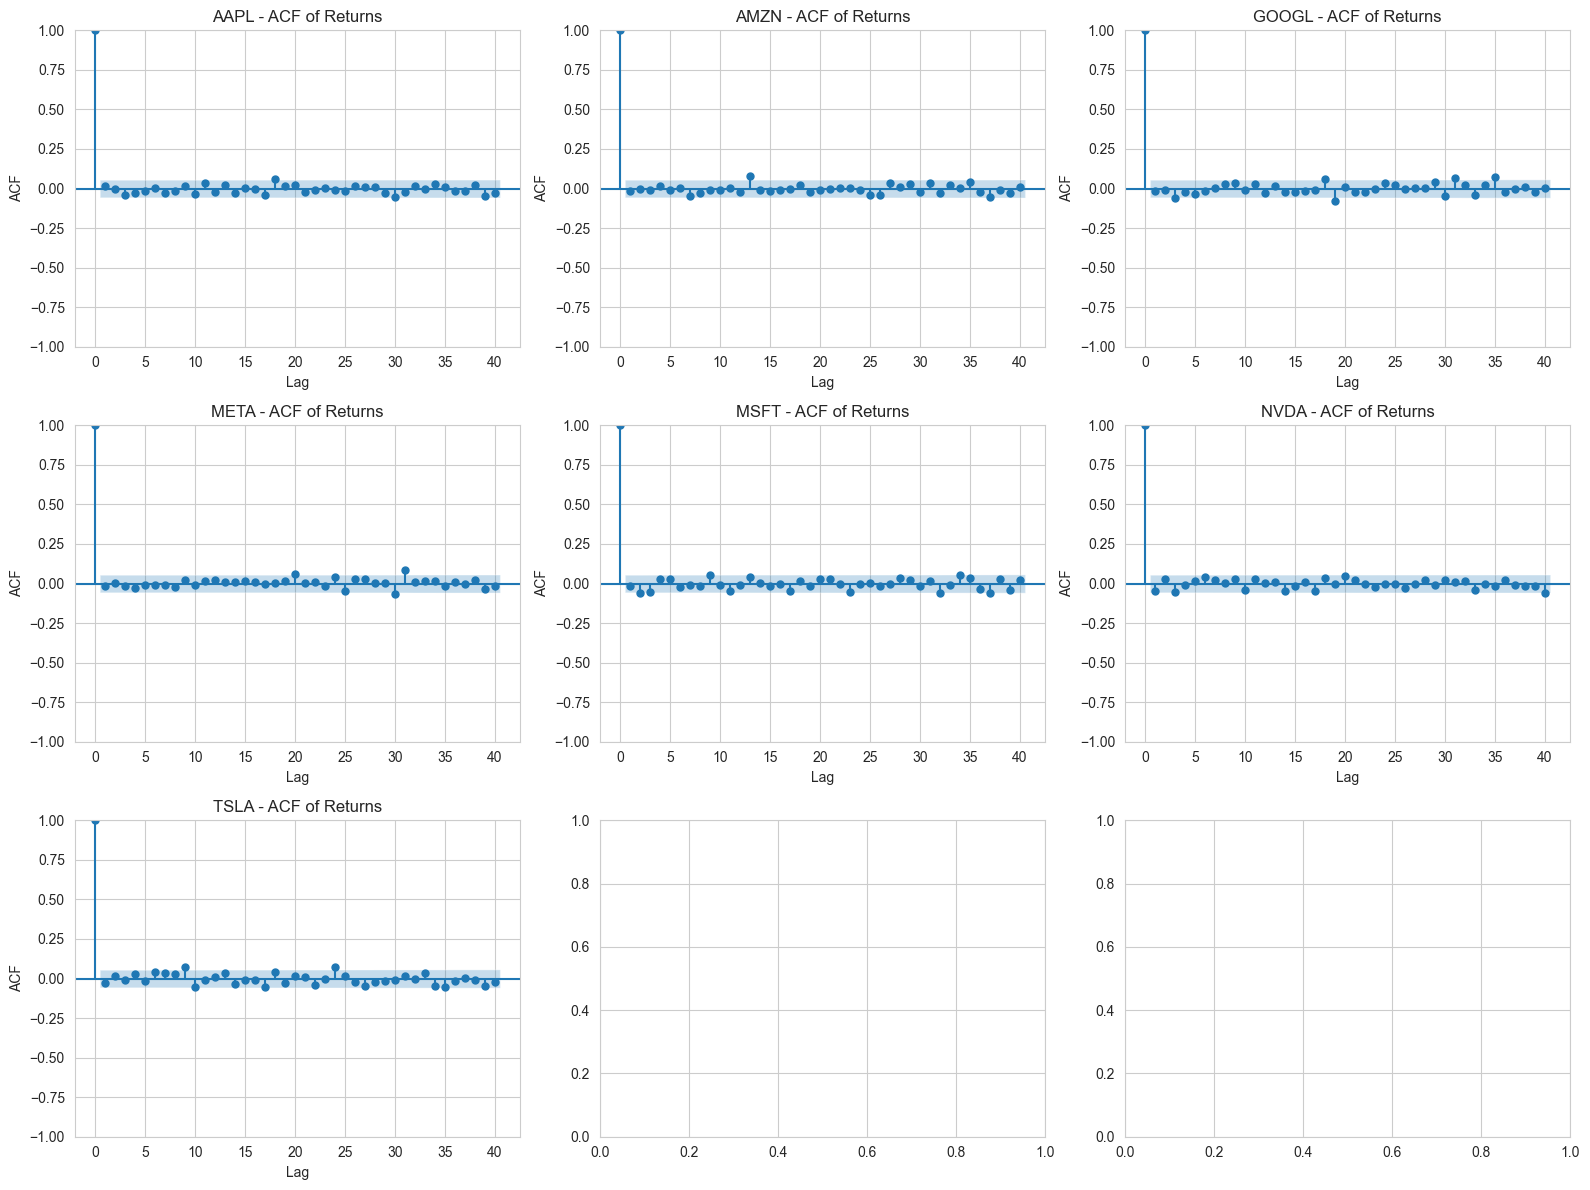

ACF of returns plots saved.


In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, stock in enumerate(stocks):
    plot_acf(returns_df[stock], lags=40, ax=axes[idx], title=f'{stock} - ACF of Returns')
    axes[idx].set_xlabel('Lag')
    axes[idx].set_ylabel('ACF')

plt.tight_layout()
plt.savefig(project_root / 'figures' / '04_acf_returns.png', dpi=300, bbox_inches='tight')
plt.show()

print("ACF of returns plots saved.")

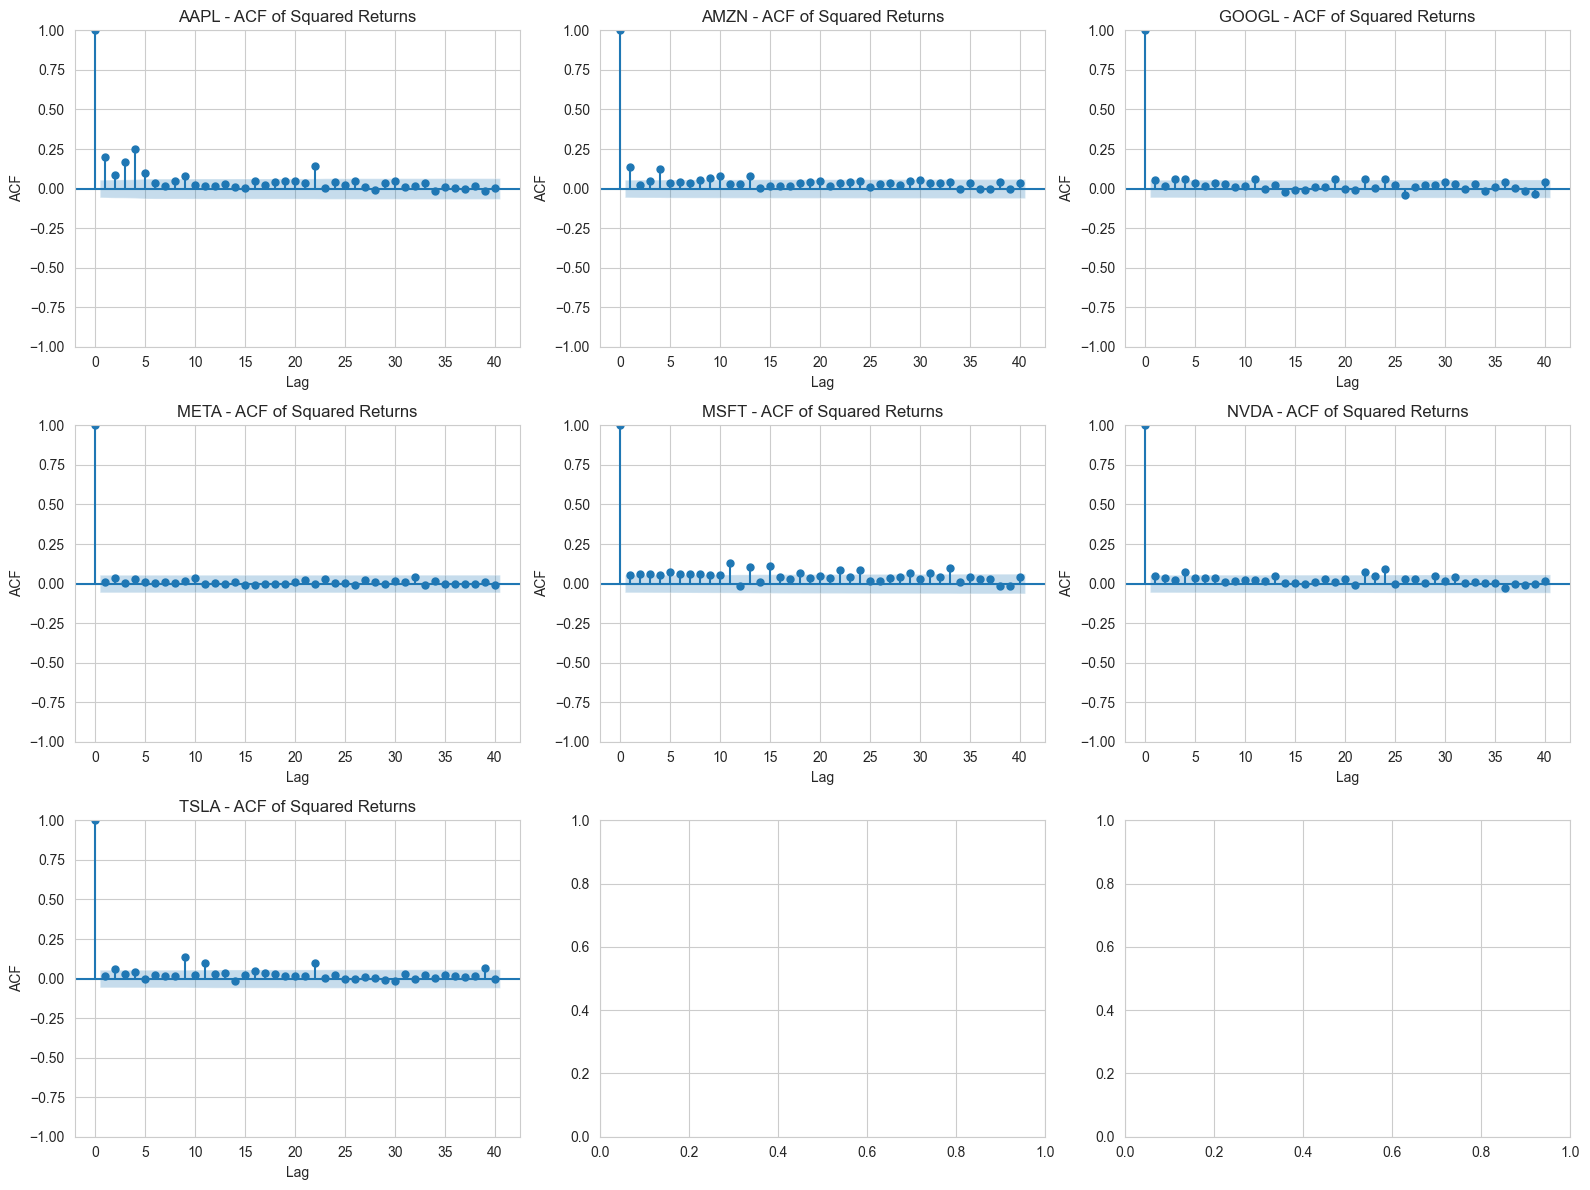

ACF of squared returns plots saved.


In [18]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, stock in enumerate(stocks):
    squared_returns = returns_df[stock] ** 2
    plot_acf(squared_returns, lags=40, ax=axes[idx], title=f'{stock} - ACF of Squared Returns')
    axes[idx].set_xlabel('Lag')
    axes[idx].set_ylabel('ACF')

plt.tight_layout()
plt.savefig(project_root / 'figures' / '05_acf_squared_returns.png', dpi=300, bbox_inches='tight')
plt.show()

print("ACF of squared returns plots saved.")


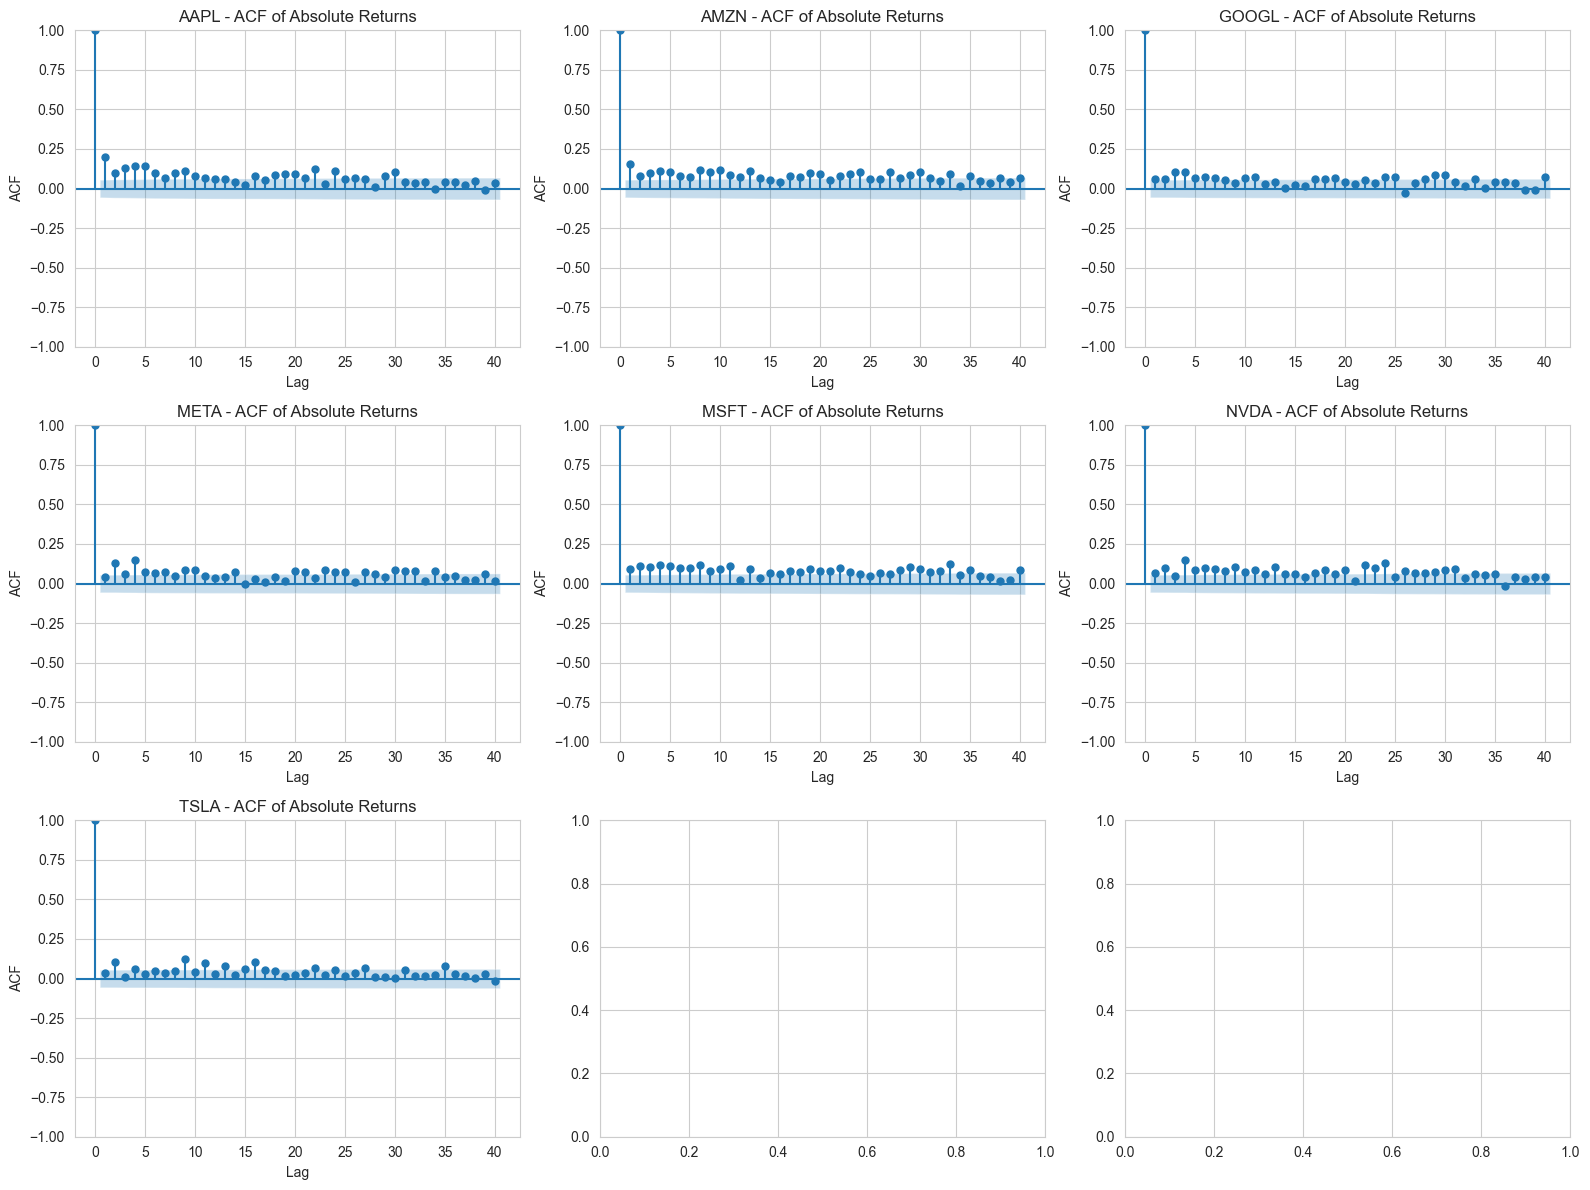

ACF of absolute returns plots saved.


In [19]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, stock in enumerate(stocks):
    abs_returns = np.abs(returns_df[stock])
    plot_acf(abs_returns, lags=40, ax=axes[idx], title=f'{stock} - ACF of Absolute Returns')
    axes[idx].set_xlabel('Lag')
    axes[idx].set_ylabel('ACF')

plt.tight_layout()
plt.savefig(project_root / 'figures' / '06_acf_absolute_returns.png', dpi=300, bbox_inches='tight')
plt.show()

print("ACF of absolute returns plots saved.")

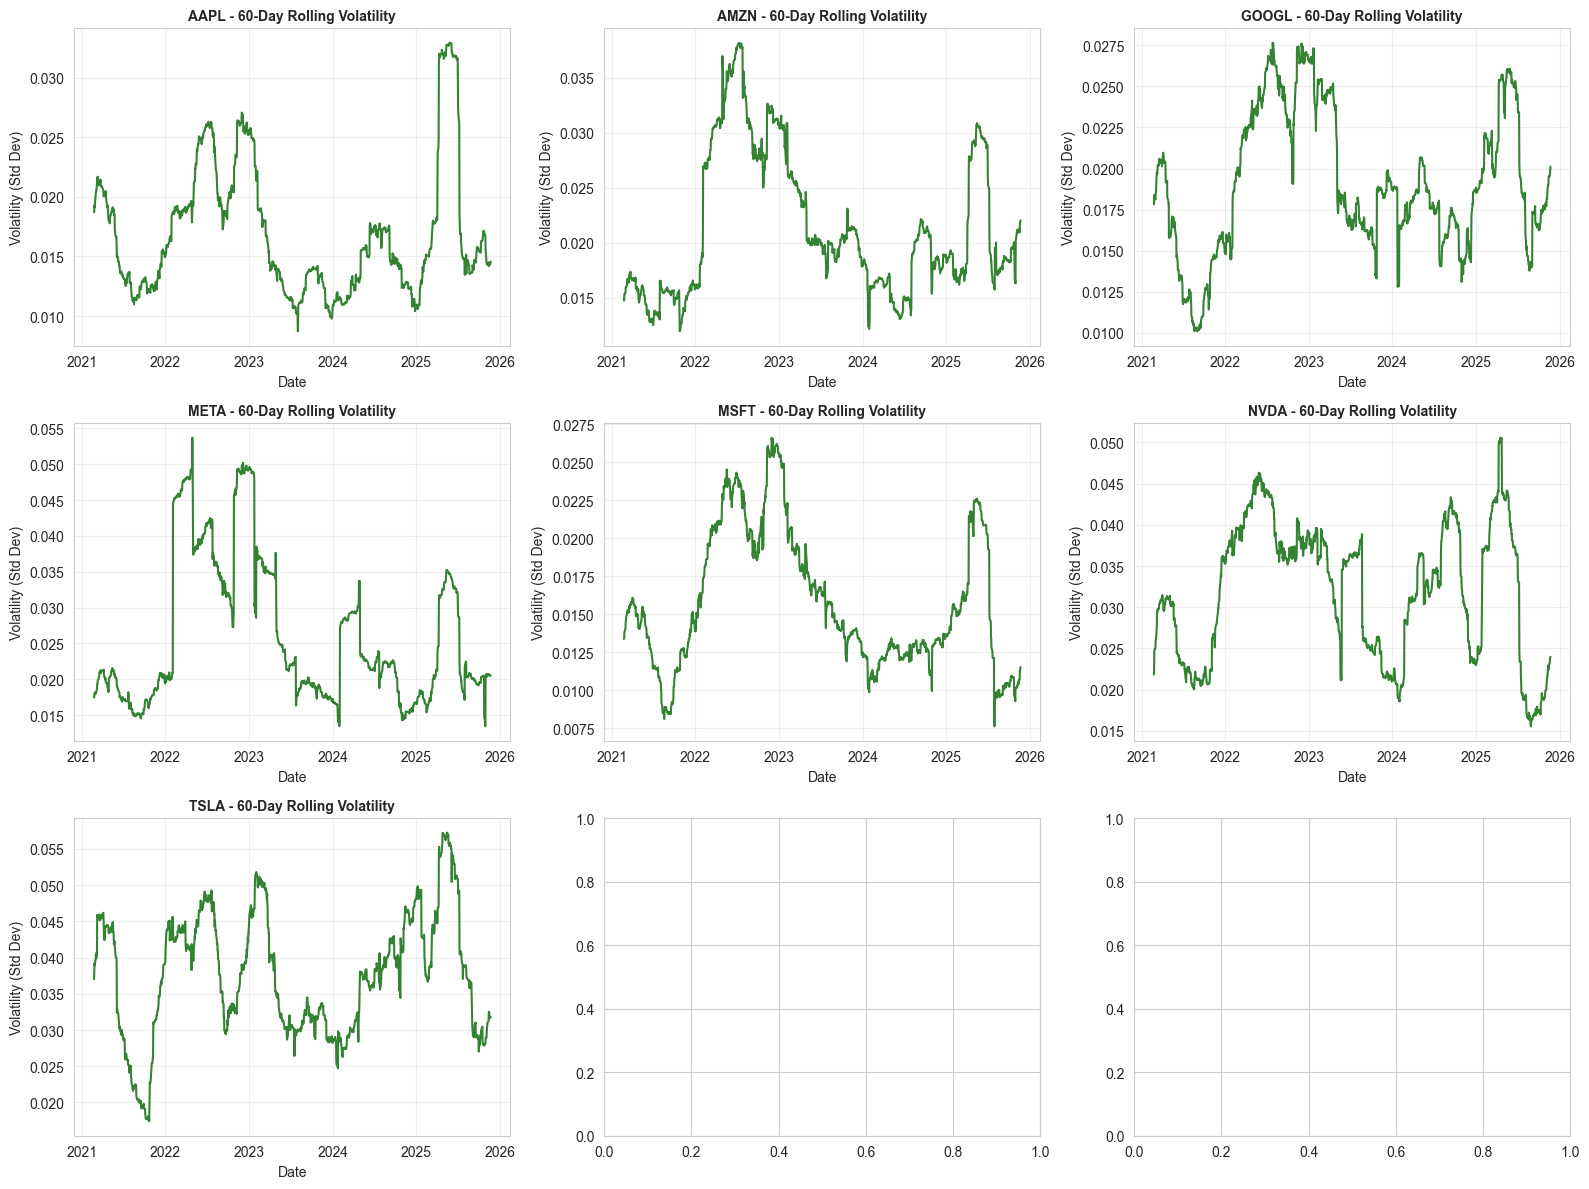

Rolling volatility plots saved.


In [21]:
window = 60  

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

rolling_vol = {}

for idx, stock in enumerate(stocks):
    vol = returns_df[stock].rolling(window=window).std()
    rolling_vol[stock] = vol
    
    axes[idx].plot(vol.index, vol, linewidth=1.5, color='darkgreen', alpha=0.8)
    axes[idx].set_title(f'{stock} - {window}-Day Rolling Volatility', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Volatility (Std Dev)')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(project_root / 'figures' / '07_rolling_volatility.png', dpi=300, bbox_inches='tight')
plt.show()

print("Rolling volatility plots saved.")

# Save rolling volatility
rolling_vol_df = pd.DataFrame(rolling_vol)
rolling_vol_df.to_csv(project_root / 'data' / 'rolling_volatility.csv')



CORRELATION MATRIX OF LOG RETURNS
           AAPL      AMZN     GOOGL      META      MSFT      NVDA      TSLA
AAPL   1.000000  0.560290  0.578336  0.483630  0.633301  0.516918  0.492860
AMZN   0.560290  1.000000  0.620612  0.597297  0.659882  0.561336  0.443804
GOOGL  0.578336  0.620612  1.000000  0.560259  0.651999  0.530217  0.408187
META   0.483630  0.597297  0.560259  1.000000  0.584455  0.493188  0.341175
MSFT   0.633301  0.659882  0.651999  0.584455  1.000000  0.631873  0.421533
NVDA   0.516918  0.561336  0.530217  0.493188  0.631873  1.000000  0.470815
TSLA   0.492860  0.443804  0.408187  0.341175  0.421533  0.470815  1.000000


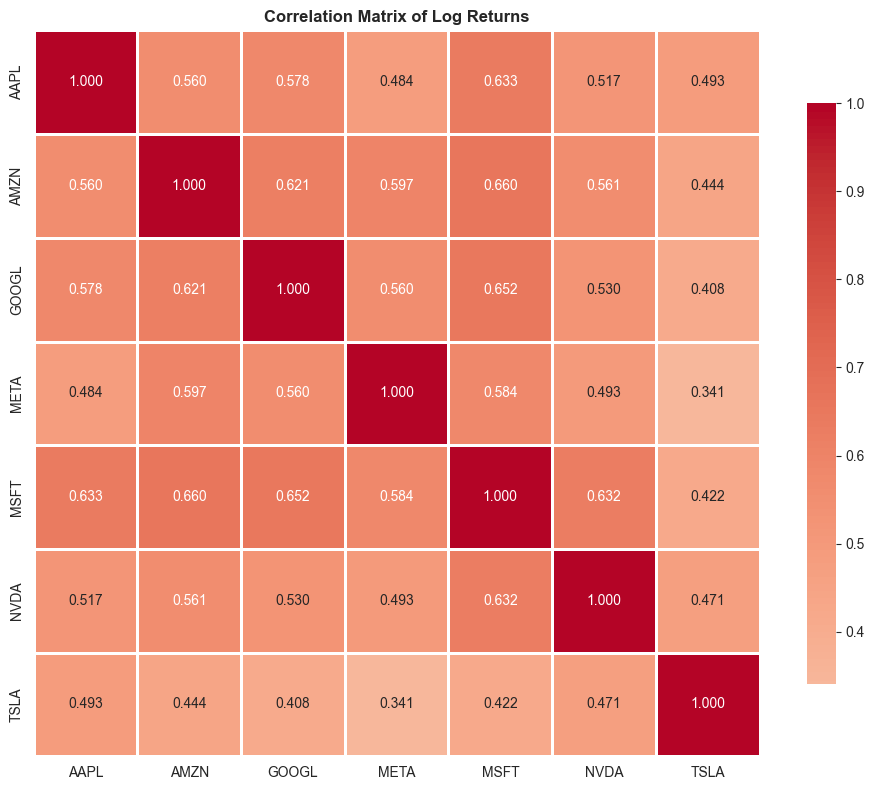

Correlation heatmap saved.


In [22]:
correlation_matrix = returns_df.corr()

print("\n" + "="*80)
print("CORRELATION MATRIX OF LOG RETURNS")
print("="*80)
print(correlation_matrix.to_string())

# Save correlation matrix
correlation_matrix.to_csv(project_root / 'data' / 'correlation_matrix.csv')

# Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix of Log Returns', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig(project_root / 'figures' / '08_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation heatmap saved.")

In [24]:
# Identify extreme returns (top 1% and bottom 1%)
quantile_99 = returns_df.quantile(0.99)
quantile_01 = returns_df.quantile(0.01)

print("\n" + "="*80)
print("EXTREME VALUES (1% QUANTILES)")
print("="*80)
print(f"\nTop 1% threshold (99th percentile):")
print(quantile_99.to_string())
print(f"\nBottom 1% threshold (1st percentile):")
print(quantile_01.to_string())


EXTREME VALUES (1% QUANTILES)

Top 1% threshold (99th percentile):
AAPL     0.043209
AMZN     0.056055
GOOGL    0.052106
META     0.063368
MSFT     0.040084
NVDA     0.080233
TSLA     0.096598

Bottom 1% threshold (1st percentile):
AAPL    -0.043324
AMZN    -0.057718
GOOGL   -0.048404
META    -0.066509
MSFT    -0.040989
NVDA    -0.079141
TSLA    -0.097143


In [25]:
var_quantiles = [0.05, 0.01]  # 5% and 1%
var_results = {}

for q in var_quantiles:
    var_results[f'VaR_{int(q*100)}%'] = returns_df.quantile(q)

var_df = pd.DataFrame(var_results)

print("\n" + "="*80)
print("VALUE AT RISK (VaR) ANALYSIS")
print("="*80)
print(var_df.to_string())

var_df.to_csv(project_root / 'data' / 'var_analysis.csv')


VALUE AT RISK (VaR) ANALYSIS
         VaR_5%    VaR_1%
AAPL  -0.028439 -0.043324
AMZN  -0.032873 -0.057718
GOOGL -0.029712 -0.048404
META  -0.039803 -0.066509
MSFT  -0.026535 -0.040989
NVDA  -0.049528 -0.079141
TSLA  -0.061241 -0.097143


In [26]:
print("\n" + "="*80)
print("TOP 10 LARGEST SINGLE-DAY MOVES (BY STOCK)")
print("="*80)

for stock in stocks:
    print(f"\n{stock}:")
    top_positive = returns_df[stock].nlargest(3)
    top_negative = returns_df[stock].nsmallest(3)
    
    print(f"  Top 3 Positive: {top_positive.values}")
    print(f"  Dates: {top_positive.index.strftime('%Y-%m-%d').tolist()}")
    print(f"  Top 3 Negative: {top_negative.values}")
    print(f"  Dates: {top_negative.index.strftime('%Y-%m-%d').tolist()}")


TOP 10 LARGEST SINGLE-DAY MOVES (BY STOCK)

AAPL:
  Top 3 Positive: [0.14261744 0.08523638 0.07283482]
  Dates: ['2025-04-09', '2022-11-10', '2022-10-28']
  Top 3 Negative: [-0.09701335 -0.07568026 -0.06047154]
  Dates: ['2025-04-03', '2025-04-04', '2022-09-13']

AMZN:
  Top 3 Positive: [0.12694892 0.11491535 0.11312359]
  Dates: ['2022-02-04', '2022-11-10', '2025-04-09']
  Top 3 Negative: [-0.15139791 -0.09408136 -0.09194763]
  Dates: ['2022-04-29', '2025-04-03', '2024-08-02']

GOOGL:
  Top 3 Positive: [0.09734782 0.09241613 0.08742921]
  Dates: ['2024-04-26', '2025-04-09', '2025-09-03']
  Top 3 Negative: [-0.09992427 -0.09585586 -0.07994226]
  Dates: ['2023-10-25', '2022-10-26', '2023-02-08']

META:
  Top 3 Positive: [0.20930745 0.18496504 0.16206434]
  Dates: ['2023-02-02', '2024-02-02', '2022-04-28']
  Top 3 Negative: [-0.30639074 -0.28179372 -0.12030229]
  Dates: ['2022-02-03', '2022-10-27', '2025-10-30']

MSFT:
  Top 3 Positive: [0.09652476 0.0790589  0.07348611]
  Dates: ['2025

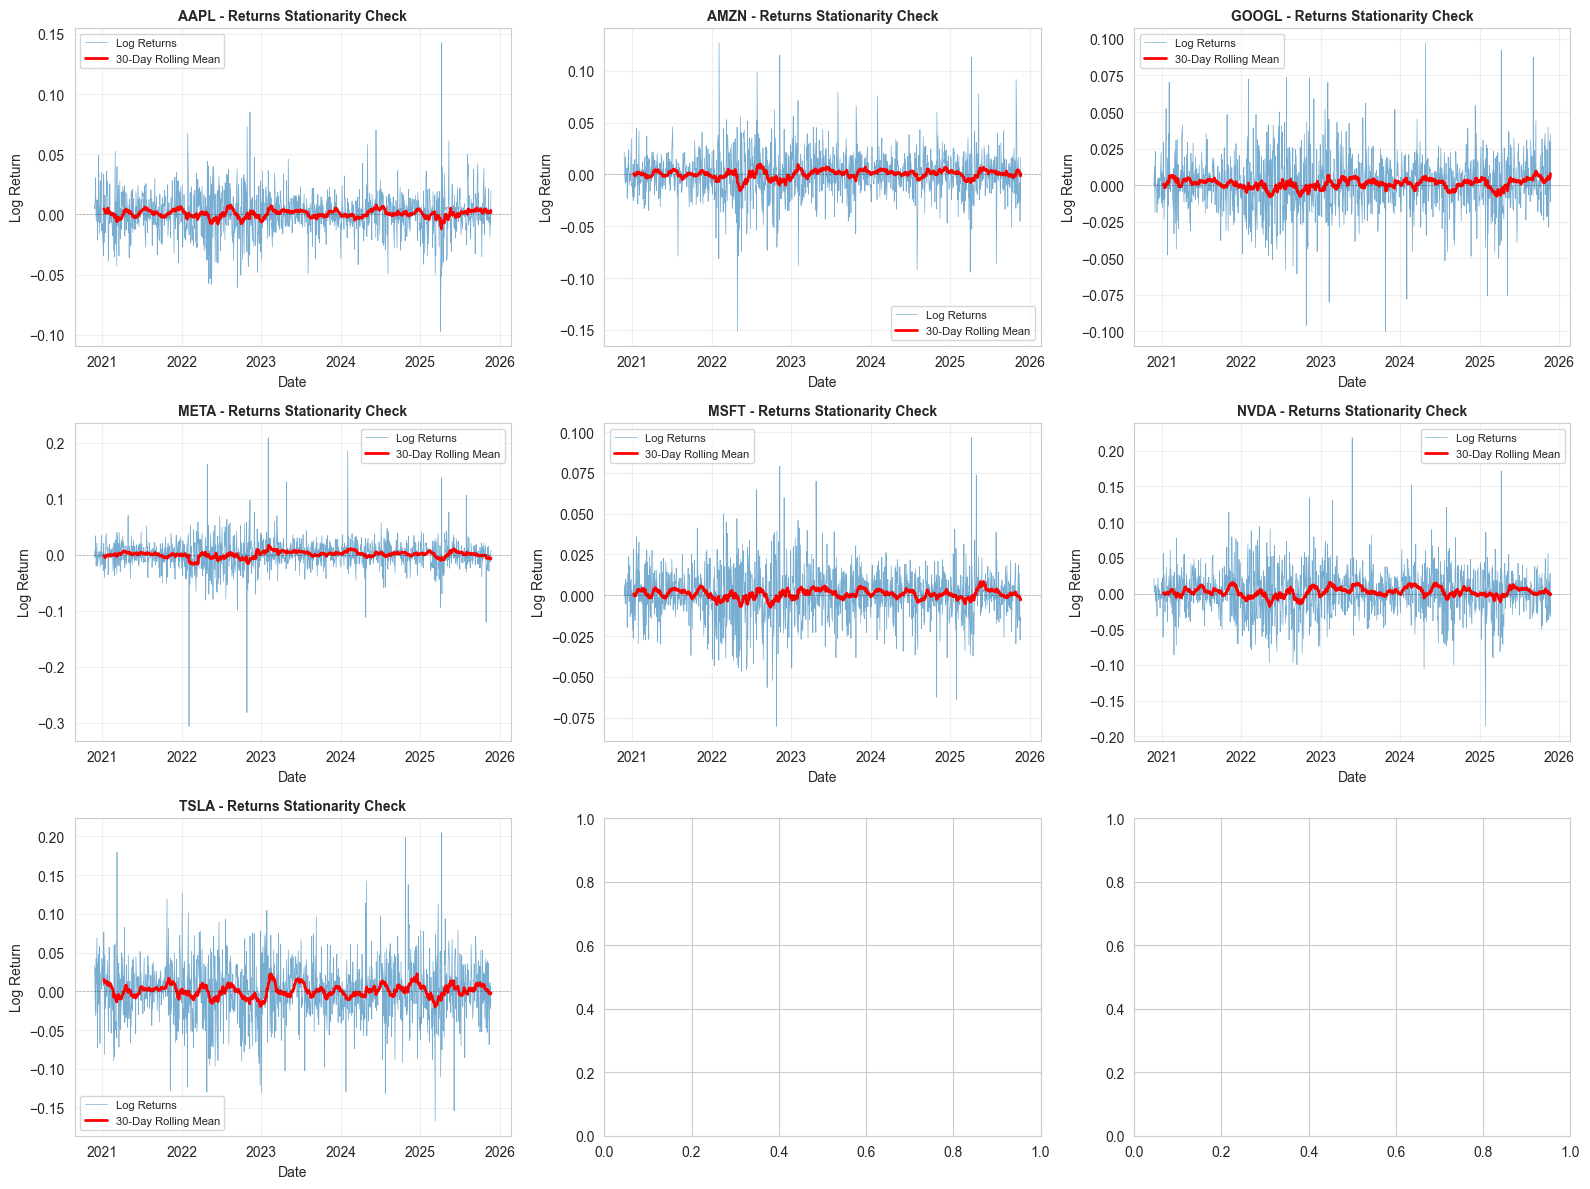

Stationarity check plots saved.


In [27]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, stock in enumerate(stocks):
    # Plot log returns with rolling mean
    returns = returns_df[stock]
    rolling_mean = returns.rolling(window=30).mean()
    
    axes[idx].plot(returns.index, returns, linewidth=0.5, alpha=0.6, label='Log Returns')
    axes[idx].plot(rolling_mean.index, rolling_mean, linewidth=2, color='red', label='30-Day Rolling Mean')
    axes[idx].set_title(f'{stock} - Returns Stationarity Check', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Log Return')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].axhline(y=0, color='black', linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig(project_root / 'figures' / '09_stationarity_check.png', dpi=300, bbox_inches='tight')
plt.show()

print("Stationarity check plots saved.")


CROSS-SECTIONAL COMPARISON OF STOCKS
       Mean Return  Volatility (Std)  Skewness  Excess Kurtosis  Min Return  Max Return
TSLA      0.000596          0.038286  0.083974         2.495353   -0.167546    0.204491
NVDA      0.002096          0.032583  0.228373         3.689535   -0.185946    0.218088
META      0.000614          0.027614 -1.218530        26.599219   -0.306391    0.209307
AMZN      0.000277          0.022123 -0.088962         5.172996   -0.151398    0.126949
GOOGL     0.000981          0.019500 -0.059824         3.172083   -0.099924    0.097348
AAPL      0.000705          0.017639  0.253682         5.351251   -0.097013    0.142617
MSFT      0.000664          0.016162  0.088211         3.025952   -0.080295    0.096525


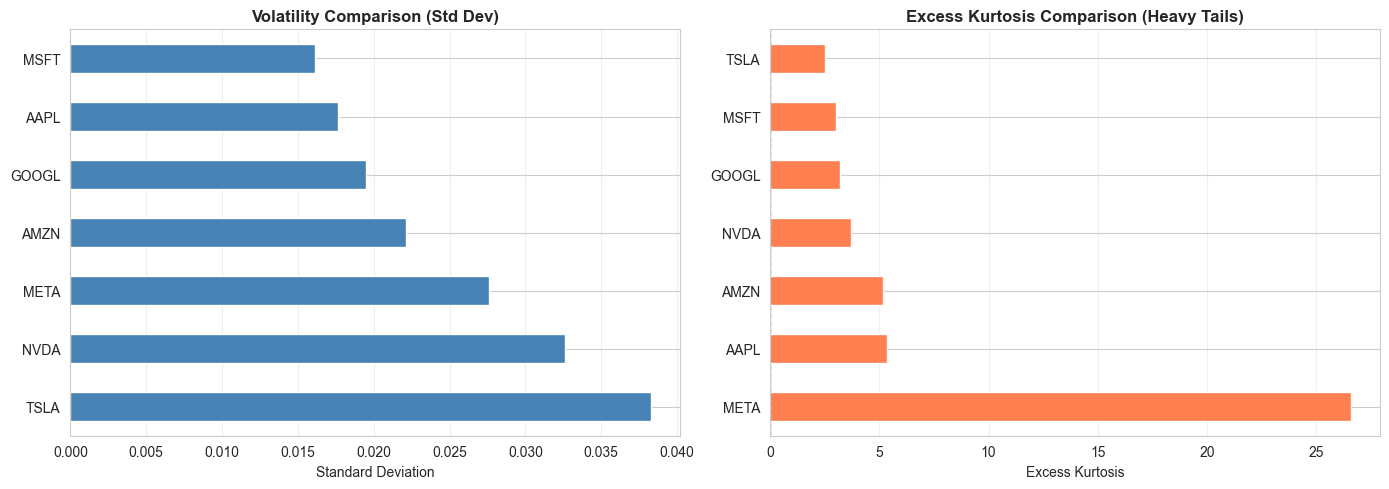

Cross-sectional comparison plots saved.


In [28]:
# Compare volatility and kurtosis across stocks
comparison_df = pd.DataFrame({
    'Mean Return': returns_df.mean(),
    'Volatility (Std)': returns_df.std(),
    'Skewness': returns_df.skew(),
    'Excess Kurtosis': returns_df.kurtosis(),
    'Min Return': returns_df.min(),
    'Max Return': returns_df.max(),
})

comparison_df = comparison_df.sort_values('Volatility (Std)', ascending=False)

print("\n" + "="*80)
print("CROSS-SECTIONAL COMPARISON OF STOCKS")
print("="*80)
print(comparison_df.to_string())

comparison_df.to_csv(project_root / 'data' / 'cross_sectional_comparison.csv')

# Visualization: Volatility and Kurtosis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Volatility comparison
comparison_df['Volatility (Std)'].sort_values(ascending=False).plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Volatility Comparison (Std Dev)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Standard Deviation')
ax1.grid(True, alpha=0.3, axis='x')

# Excess Kurtosis comparison
comparison_df['Excess Kurtosis'].sort_values(ascending=False).plot(kind='barh', ax=ax2, color='coral')
ax2.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_title('Excess Kurtosis Comparison (Heavy Tails)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Excess Kurtosis')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(project_root / 'figures' / '10_cross_sectional_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Cross-sectional comparison plots saved.")